In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
historic_data = pd.read_csv("datasets/historical_data.csv")
fear_index_data = pd.read_csv("datasets/fear_greed_index.csv")

In [4]:
historic_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
fear_index_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
print(historic_data.info())
print(fear_index_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
print(historic_data.shape)
print(fear_index_data.shape)

(211224, 16)
(2644, 4)


In [18]:
fear_index_data["classification"].value_counts().sort_index()

classification
Extreme Fear     508
Extreme Greed    326
Fear             781
Greed            633
Neutral          396
Name: count, dtype: int64

In [28]:
historic_data["date"] = pd.to_datetime(historic_data["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
fear_index_data["date"] = pd.to_datetime(fear_index_data["date"]).dt.date

In [29]:
historic_data["date"].sort_values()

83771    2023-05-01
83769    2023-05-01
83770    2023-05-01
39063    2023-12-05
39062    2023-12-05
            ...    
13952    2025-05-01
13951    2025-05-01
13950    2025-05-01
13948    2025-05-01
14004    2025-05-01
Name: date, Length: 211224, dtype: object

In [30]:
fear_index_data["date"].sort_values()

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object

In [31]:
merged = pd.merge(historic_data, fear_index_data[["date", "classification"]], on="date", how="left")

print(merged[["date", "classification"]].head())
print(merged["classification"].value_counts(dropna=False))

         date classification
0  2024-12-02  Extreme Greed
1  2024-12-02  Extreme Greed
2  2024-12-02  Extreme Greed
3  2024-12-02  Extreme Greed
4  2024-12-02  Extreme Greed
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64


In [32]:
merged.groupby('classification')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


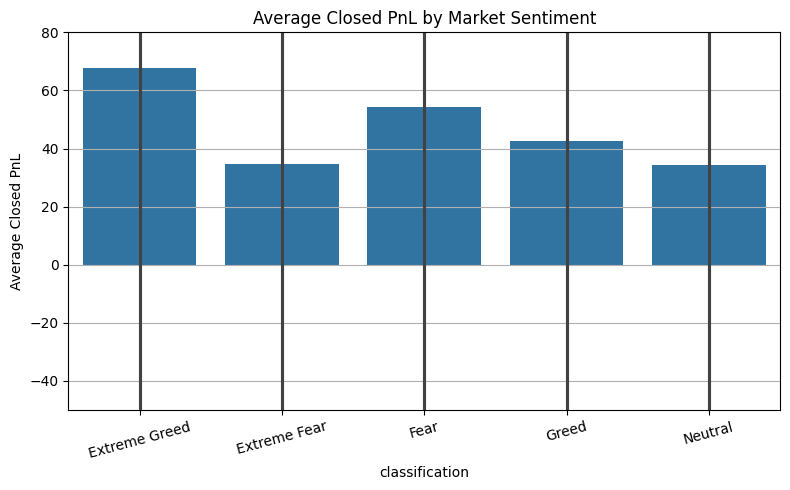

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged, x="classification", y="Closed PnL", estimator="mean", errorbar="sd")
plt.ylim(-50, 80)
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows that trades during Extreme Greed periods yield the highest average closed PnL, followed by Fear, suggesting strong sentiment—positive or negative—creates profitable trading opportunities. Neutral sentiment results in the lowest average PnL, likely due to reduced market volatility. Overall, the data suggests traders perform better when market emotions are heightened.

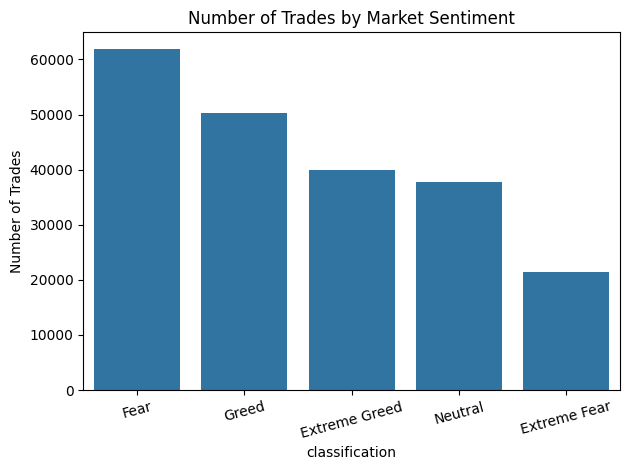

In [37]:
sns.countplot(data=merged, x="classification", order=merged["classification"].value_counts().index)
plt.title("Number of Trades by Market Sentiment")
plt.xticks(rotation=15)
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()

Traders are most active during Fear and Greed, and less active during Extreme Fear or Extreme Greed. This suggests that while moderate sentiment changes drive participation, extreme emotions might lead to caution, either out of fear of losses or overconfidence leading to inaction.

In [46]:
print(merged[merged["Closed PnL"] <= 0].shape)

(124355, 19)


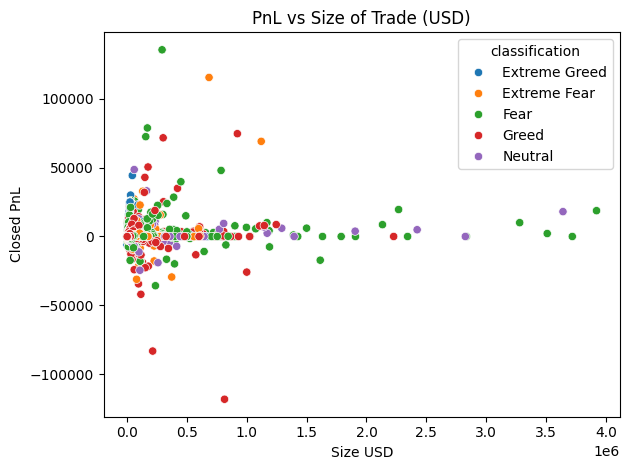

In [51]:
sns.scatterplot(data=merged, x="Size USD", y="Closed PnL", hue="classification")
plt.title("PnL vs Size of Trade (USD)")
plt.tight_layout()
plt.show()

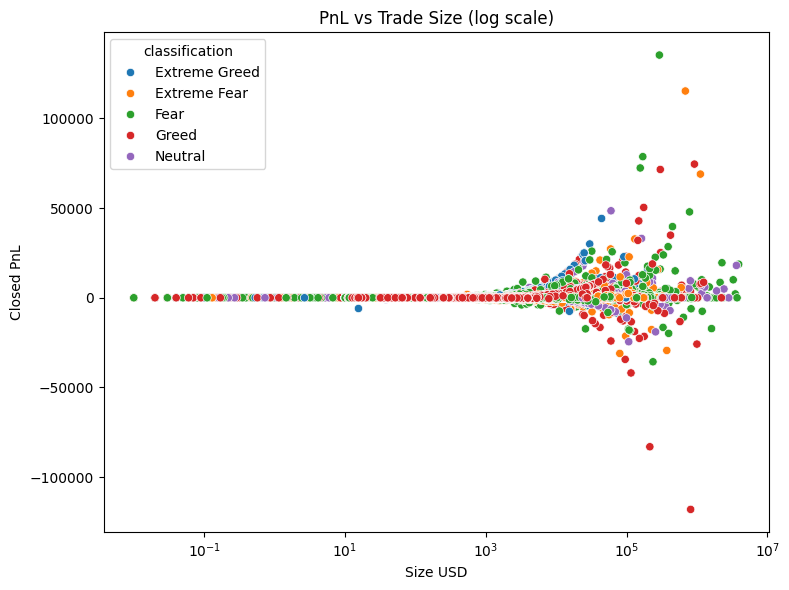

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='Size USD', y='Closed PnL', hue='classification')
plt.xscale('log')
plt.title("PnL vs Trade Size (log scale)")
plt.tight_layout()
plt.show()


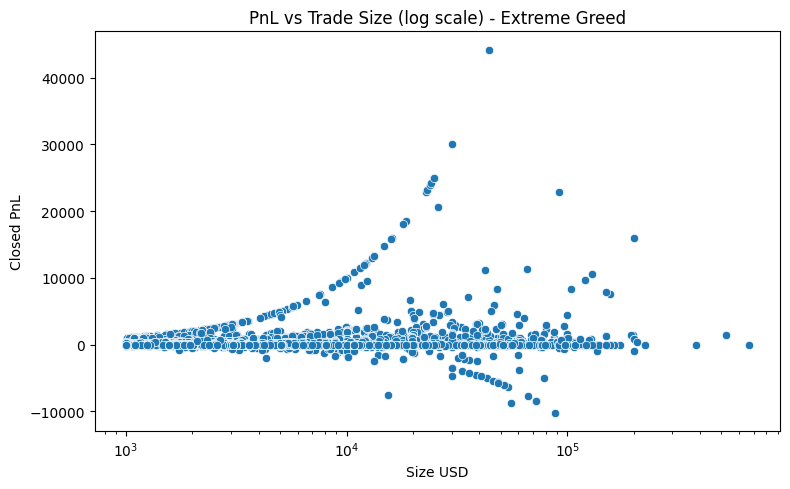

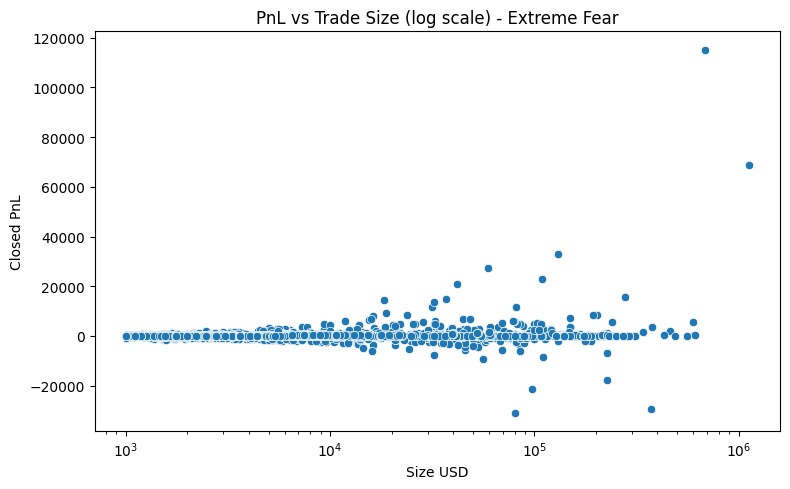

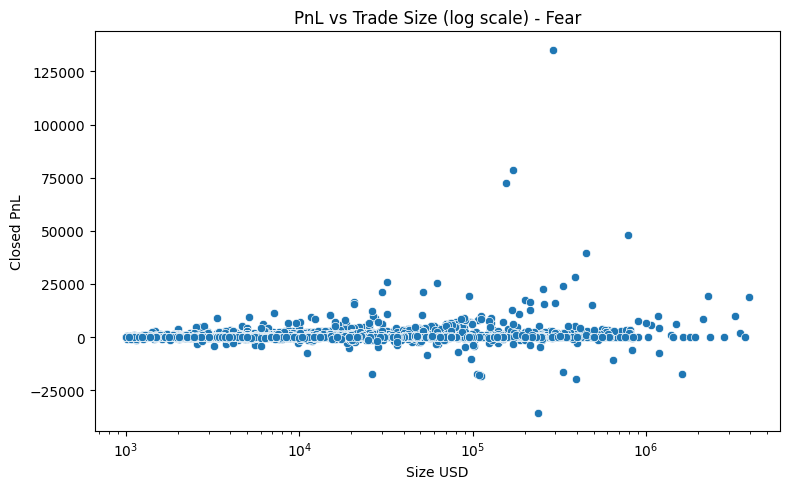

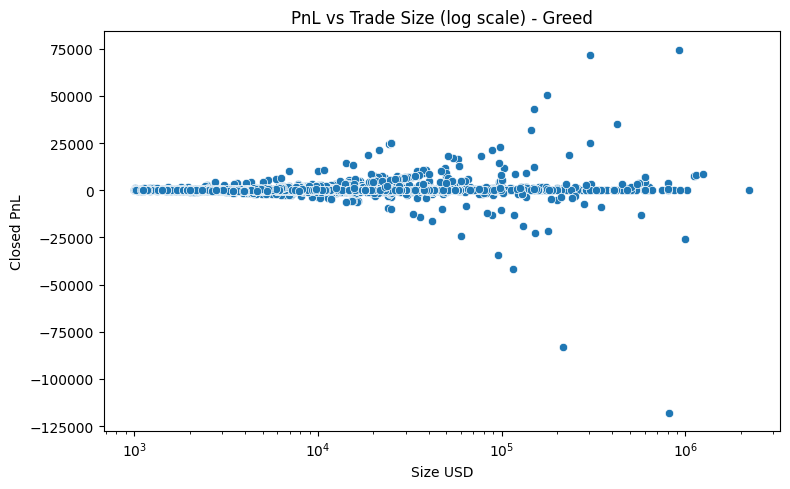

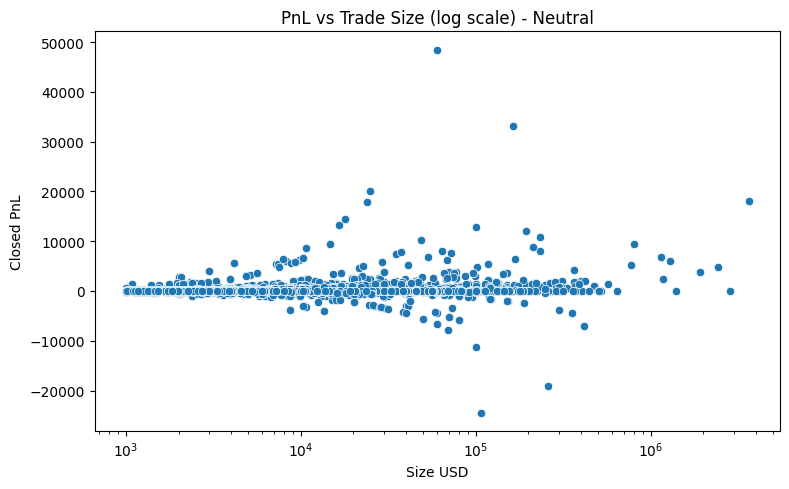

In [84]:
sentiments = merged["classification"].dropna().unique()

for sentiment in sentiments:
    subset = merged[merged["classification"] == sentiment]
    filtered = subset[subset["Size USD"] > 1e3]

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=filtered, x="Size USD", y="Closed PnL")
    plt.xscale("log")
    plt.title(f"PnL vs Trade Size (log scale) - {sentiment}")
    plt.tight_layout()
    plt.show()

The individual scatterplots for each sentiment reveal that most trades cluster near the zero PnL line, but the distribution varies across sentiments. In Extreme Greed, positive PnL values dominate, with a wider spread on the positive side. Fear and Extreme Fear show occasional large profits, though most trades stay within ±40k. Greed has a broader negative spread, with a few outliers causing large losses. Neutral sentiment exhibits the narrowest range, with PnLs mostly between -10k and 18k. These patterns suggest that trading during strong sentiment phases can result in more volatile but potentially more profitable outcomes.

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


/tmp/ipykernel_19715/3062808009.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pnl_by_sentiment.index, y=mean_pnl_by_sentiment.values, palette="viridis")


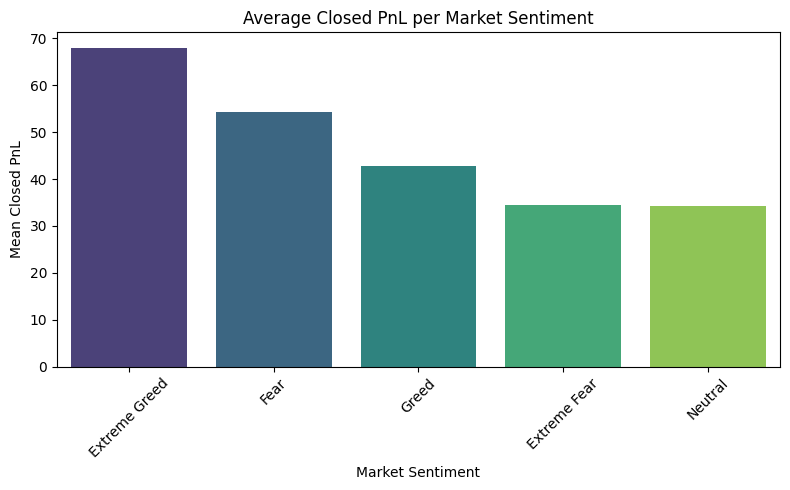

In [66]:
mean_pnl_by_sentiment = merged.groupby("classification")["Closed PnL"].mean().sort_values(ascending=False)

print(mean_pnl_by_sentiment)

plt.figure(figsize=(8, 5))
sns.barplot(x=mean_pnl_by_sentiment.index, y=mean_pnl_by_sentiment.values, palette="viridis")
plt.title("Average Closed PnL per Market Sentiment")
plt.ylabel("Mean Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of mean Closed PnL across market sentiment reveals that traders tend to perform best during periods of Extreme Greed, with an average gain of ~68 units. Interestingly, Fearful market conditions outperform Greedy ones, indicating that trader caution might yield better outcomes than overconfidence. However, the median PnL remains zero across all sentiments, suggesting that most trades are not profitable, and a few high-performing outliers skew the average. This implies that while extreme sentiment offers opportunities, only a small subset of traders capitalize effectively.

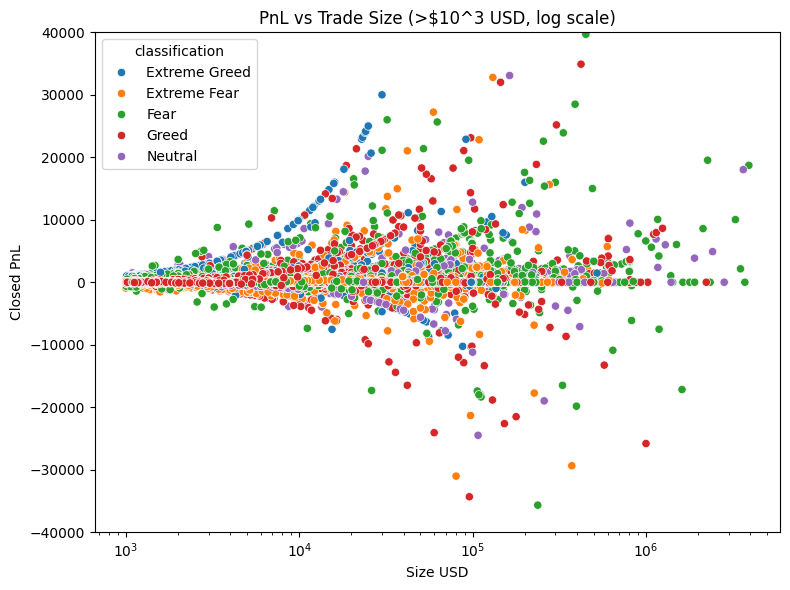

In [82]:
filtered = merged[merged["Size USD"]>1e3]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x="Size USD", y="Closed PnL", hue="classification")
plt.ylim(-40000, 40000)
plt.xscale("log")
plt.title("PnL vs Trade Size (>$10^3 USD, log scale)")
plt.tight_layout()
plt.show()

The scatter plot of Closed PnL vs. Trade Size (log scale) for trades above $1,000 USD shows that trade profitability increases in volatility with size. In particular, trades during Extreme Greed show a higher density of profitable outcomes, while trades under Fear and Greed are more erratic. The wide spread and few high outliers suggest that while sentiment provides an edge, individual trader behavior and risk management are crucial.

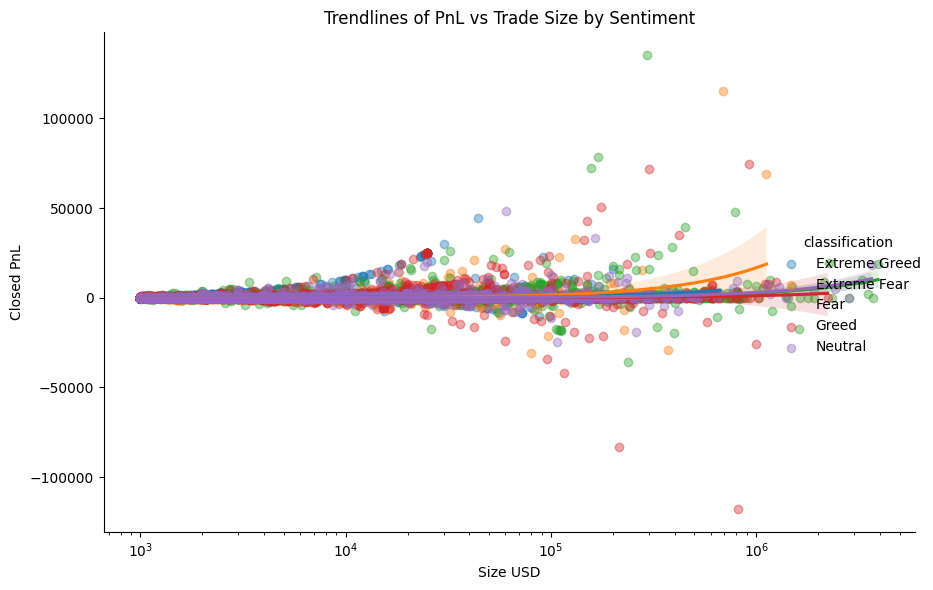

In [83]:
sns.lmplot(data=filtered, x='Size USD', y='Closed PnL', hue='classification', scatter_kws={'alpha':0.4}, height=6, aspect=1.3)
#plt.ylim(-10000, 20000)
plt.xscale("log")
plt.title("Trendlines of PnL vs Trade Size by Sentiment")
plt.tight_layout()
plt.show()

The trendline analysis shows that trader profitability increases with trade size most notably during periods of Extreme Greed. In contrast, other sentiment conditions do not show meaningful increases in PnL as trade size grows, and may even exhibit slight declines. This reinforces that market sentiment significantly influences the risk-reward profile of large trades.